# VKOSPI (Volatility) Prediction

Welcome to *My money making series*

This project refer to https://www.kaggle.com/datasets/ninetyninenewton/vkospi

# Context
The implied volatility of the Korean market is represented by the index called VKOSPI. An underlying asset of VKOSPI is KOSPI200, which is widely known as a Korean blue-chip index. VKOSPI is calculated based on KOSPI200 options. To put it simple, KOSPI200 and VKOSPI is analogous to S&P500 and VIX in the US.

# Options
Options are financial instruments that are derivatives based on the value of underlying securities such as stocks. An options contract offers the buyer the opportunity to buy or sell—depending on the type of contract they hold—the underlying asset. Unlike futures, the holder is not required to buy or sell the asset if they choose not to.

* Call options allow the holder to buy the asset at a stated price within a specific timeframe.
* Put options allow the holder to sell the asset at a stated price within a specific timeframe.

Each option contract will have a specific expiration date by which the holder must exercise their option.

# Volatility
In finance, volatility (symbol σ) is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns.
Historic volatility measures a time series of past market prices. Implied volatility looks forward in time, being derived from the market price of a market-traded derivative (in particular, an option).

# Why am I interested in this project?
Options, It's my favorite investment. Because not only predicting the direction can also design a variety of investment strategies.

From https://www.investopedia.com/terms/v/volatility.asp
* Volatility represents how large an asset's prices swing around the mean price—it is a statistical measure of its dispersion of returns.
* There are several ways to measure volatility, including beta coefficients, option pricing models, and standard deviations of returns.
* Volatile assets are often considered riskier than less volatile assets because the price is expected to be less predictable.
* Volatility is an important variable for calculating options prices.

So if we can predict "volatility" then we can better predict option prices.

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 2. Explore data

In [2]:
# import a dataset
df = pd.read_csv('/kaggle/input/vkospi/options_KR.csv')
df.head()

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
0,2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
1,2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2,2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
3,2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,Fri
4,2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,Mon


In [3]:
# check if there are any missing values
df.isna().sum()   # don't have any missing values

Date                               0
VKOSPI                             0
KOSPI200                           0
Open_interest                      0
For_KOSPI_Netbuying_Amount         0
For_Future_Netbuying_Quantity      0
For_Call_Netbuying_Quantity        0
For_Put_Netbuying_Quantity         0
Indiv_Future_Netbuying_Quantity    0
Indiv_Call_Netbuying_Quantity      0
Indiv_Put_Netbuying_Quantity       0
PCRatio                            0
Day_till_expiration                0
Day_of_a_week                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2580 non-null   object 
 1   VKOSPI                           2580 non-null   float64
 2   KOSPI200                         2580 non-null   float64
 3   Open_interest                    2580 non-null   int64  
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64
 5   For_Future_Netbuying_Quantity    2580 non-null   int64  
 6   For_Call_Netbuying_Quantity      2580 non-null   int64  
 7   For_Put_Netbuying_Quantity       2580 non-null   int64  
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64  
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64  
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64  
 11  PCRatio                          2580 non-null   float64
 12  Day_till_expiration 

In [5]:
df.describe()

,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration
count,2580.000000,2580.000000,2.580000e+03,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,16.744302,259.246508,2.303927e+06,2.889290e+10,10.226744,2727.117829,14117.202326,4.820930,16000.406589,6695.945736,0.954837,9.982946
std,5.327865,29.034358,1.578398e+06,2.560887e+11,3953.221118,19549.308255,25202.453076,2126.388898,53037.030365,59832.131764,0.170583,6.293434
min,9.720000,174.320000,2.242960e+05,-1.310000e+12,-20745.000000,-174455.000000,-183760.000000,-11879.000000,-179929.000000,-151533.000000,0.280000,0.000000
25%,13.087500,243.750000,1.013118e+06,-1.130000e+11,-2164.750000,-2863.250000,1836.000000,-1209.500000,-2574.000000,-13051.250000,0.850000,5.000000
50%,15.305000,257.310000,1.879194e+06,2.221070e+10,31.000000,1780.000000,9257.500000,-13.000000,4984.000000,-2065.500000,0.950000,10.000000
75%,18.772500,271.570000,3.236718e+06,1.670000e+11,2221.500000,7435.250000,23097.500000,1213.500000,17872.250000,9729.000000,1.050000,15.000000
max,50.110000,338.830000,9.134484e+06,1.720000e+12,20265.000000,152445.000000,228939.000000,10325.000000,908263.000000,919563.000000,1.790000,26.000000


In [6]:
# change data type
df['Date']= pd.to_datetime(df['Date']) # change to Date format
df['Day_of_a_week']= df['Day_of_a_week'].replace('Mon',1) # Change Mon to 1
df['Day_of_a_week']= df['Day_of_a_week'].replace('Tue',2) # Change Tue to 2
df['Day_of_a_week']= df['Day_of_a_week'].replace('Wed',3) # Change Wed to 3
df['Day_of_a_week']= df['Day_of_a_week'].replace('Thu',4) # Change Thu to 4
df['Day_of_a_week']= df['Day_of_a_week'].replace('Fri',5) # Change Fri to 5
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2580 non-null   datetime64[ns]
 1   VKOSPI                           2580 non-null   float64       
 2   KOSPI200                         2580 non-null   float64       
 3   Open_interest                    2580 non-null   int64         
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64       
 5   For_Future_Netbuying_Quantity    2580 non-null   int64         
 6   For_Call_Netbuying_Quantity      2580 non-null   int64         
 7   For_Put_Netbuying_Quantity       2580 non-null   int64         
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64         
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64         
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64      

<Figure size 720x720 with 0 Axes>

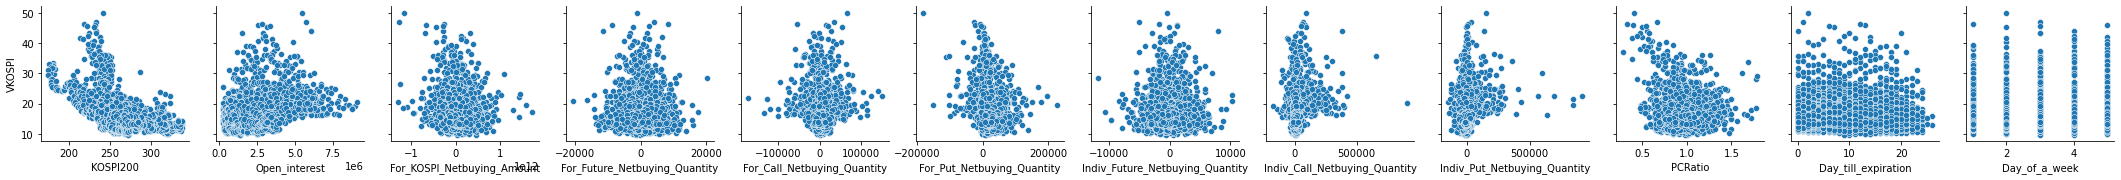

In [7]:
plt.figure(figsize=(10,10))
sns.pairplot(df, x_vars=['KOSPI200', 'Open_interest',
       'For_KOSPI_Netbuying_Amount', 'For_Future_Netbuying_Quantity',
       'For_Call_Netbuying_Quantity', 'For_Put_Netbuying_Quantity',
       'Indiv_Future_Netbuying_Quantity', 'Indiv_Call_Netbuying_Quantity',
       'Indiv_Put_Netbuying_Quantity', 'PCRatio', 'Day_till_expiration',
       'Day_of_a_week'], y_vars=['VKOSPI']);

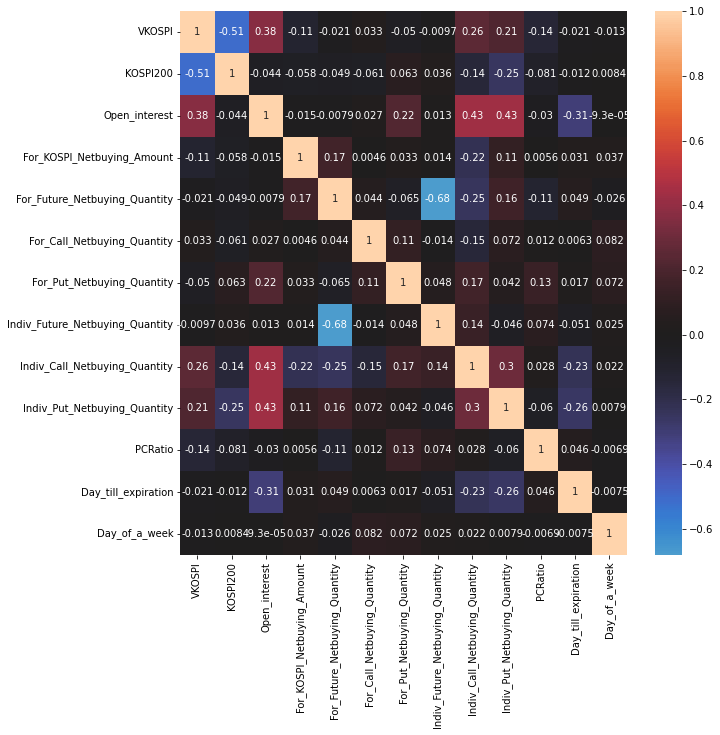

In [8]:
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_matrix, annot = True, center = 0);

When we looked at the correlation, we found that VKOSPI was the most negatively correlated with KOSPI200 (-0.51). However, there was not much effect on VKOSPI.

# 3. Split data

In [9]:
# X = feature variables, y = a target variable
X = df.drop(["Date","VKOSPI"], axis=1)
y = df['VKOSPI']

print(f"X: {X.shape}")

X: (2580, 12)


In [10]:
# split data 70% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1806, 12)
y_train: (1806,)
X_test:  (774, 12)
y_test:  (774,)


# 4. Model fitting

In [11]:
# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.22543e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


ElasticNet(alpha=0.01)

# 5. Model evaluation

In [12]:
# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 4.0111
R-squared from Linear model : 0.3616

RMSE from Logistic model : 4.0111
R-squared from Logistic model : 0.3616

RMSE from Ridge model : 4.0111
R-squared from Ridge model : 0.3616

RMSE from Lasso model : 4.0061
R-squared from Lasso model : 0.3632

RMSE from ElasticNet model : 3.9996
R-squared from ElasticNet model : 0.3653


# 6. Conclusion

Based on machine learning, the ElasticNet model yields a maximum R-squared of 0.3653, but it is still less accurate in predicting VKOSPI.

Next step.
Each parameters may not be related. By looking at correlation and the R-squared effect. I think it's more interesting to measure it in terms of **rate of change**.

# Keep Improving

Now I will try to calulate **rate of change** of `VKOSPI`, `KOSPI200` and `Open_interest`

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2580 non-null   datetime64[ns]
 1   VKOSPI                           2580 non-null   float64       
 2   KOSPI200                         2580 non-null   float64       
 3   Open_interest                    2580 non-null   int64         
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64       
 5   For_Future_Netbuying_Quantity    2580 non-null   int64         
 6   For_Call_Netbuying_Quantity      2580 non-null   int64         
 7   For_Put_Netbuying_Quantity       2580 non-null   int64         
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64         
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64         
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64      

In [14]:
# Create Rate of Change column
df2=pd.DataFrame() # Create new data frame

# Rate of Change column
df2['roc_VKOSPI']=(((df['VKOSPI'].shift(periods=-1)-df['VKOSPI'])/df['VKOSPI'])*100).round(4)
df2['roc_KOSPI200']=(((df['KOSPI200'].shift(periods=-1)-df['KOSPI200'])/df['KOSPI200'])*100).round(4)
df2['roc_Open_interest']=(((df['Open_interest'].shift(periods=-1)-df['Open_interest'])/df['Open_interest'])*100).round(4)

# Shift data
df2['new_For_KOSPI_Netbuying_Amount']=df['For_KOSPI_Netbuying_Amount'].shift(periods=-1)
df2['new_For_Future_Netbuying_Quantity']=df['For_Future_Netbuying_Quantity'].shift(periods=-1)
df2['new_For_Call_Netbuying_Quantity']=df['For_Call_Netbuying_Quantity'].shift(periods=-1)
df2['new_For_Put_Netbuying_Quantity']=df['For_Put_Netbuying_Quantity'].shift(periods=-1)
df2['new_Indiv_Future_Netbuying_Quantity']=df['Indiv_Future_Netbuying_Quantity'].shift(periods=-1)
df2['new_Indiv_Call_Netbuying_Quantity']=df['Indiv_Call_Netbuying_Quantity'].shift(periods=-1)
df2['new_Indiv_Put_Netbuying_Quantity']=df['Indiv_Put_Netbuying_Quantity'].shift(periods=-1)
df2['new_Day_till_expiration']=df['Day_till_expiration'].shift(periods=-1)
df2['new_PCRatio']=df['PCRatio'].shift(periods=-1)
df2['new_Day_till_expiration']=df['Day_till_expiration'].shift(periods=-1)
df2['new_Day_of_a_week']=df['Day_of_a_week'].shift(periods=-1)

df2

,roc_VKOSPI,roc_KOSPI200,roc_Open_interest,new_For_KOSPI_Netbuying_Amount,new_For_Future_Netbuying_Quantity,new_For_Call_Netbuying_Quantity,new_For_Put_Netbuying_Quantity,new_Indiv_Future_Netbuying_Quantity,new_Indiv_Call_Netbuying_Quantity,new_Indiv_Put_Netbuying_Quantity,new_Day_till_expiration,new_PCRatio,new_Day_of_a_week
0,-2.3617,-0.2377,4.2239,-8.997074e+10,47.0,-57128.0,46851.0,399.0,127709.0,-22259.0,6.0,0.93,3.0
1,-0.3062,-0.0887,5.8043,-1.090000e+11,-7666.0,-2000.0,48883.0,5744.0,262558.0,10367.0,5.0,0.87,4.0
2,1.1978,-2.5290,4.0476,9.842024e+10,969.0,64792.0,27196.0,-1688.0,79789.0,113935.0,4.0,0.89,5.0
3,-7.7086,1.1494,5.3968,4.329179e+10,5797.0,10995.0,23123.0,-5534.0,97154.0,146244.0,3.0,0.81,1.0
4,0.1644,-0.0563,4.2794,9.251058e+10,-10439.0,-9091.0,33572.0,4393.0,165009.0,12536.0,2.0,1.02,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0.7564,0.9463,1.4260,7.023820e+10,5676.0,1249.0,-6222.0,-1357.0,-11617.0,-7563.0,3.0,0.87,1.0
2576,0.7508,1.4761,1.3376,3.250000e+11,-2167.0,-1932.0,16951.0,1341.0,12141.0,-5222.0,2.0,0.99,2.0
2577,3.5022,0.6512,1.8942,2.380000e+11,316.0,14251.0,8795.0,957.0,-15649.0,-5103.0,1.0,0.69,3.0
2578,-0.7919,0.0492,3.0680,-1.550000e+11,2291.0,-2953.0,26965.0,-1137.0,25430.0,-14659.0,0.0,0.87,4.0


In [15]:
# Delete last row
df2=df2.iloc[:-1, :]
df2

,roc_VKOSPI,roc_KOSPI200,roc_Open_interest,new_For_KOSPI_Netbuying_Amount,new_For_Future_Netbuying_Quantity,new_For_Call_Netbuying_Quantity,new_For_Put_Netbuying_Quantity,new_Indiv_Future_Netbuying_Quantity,new_Indiv_Call_Netbuying_Quantity,new_Indiv_Put_Netbuying_Quantity,new_Day_till_expiration,new_PCRatio,new_Day_of_a_week
0,-2.3617,-0.2377,4.2239,-8.997074e+10,47.0,-57128.0,46851.0,399.0,127709.0,-22259.0,6.0,0.93,3.0
1,-0.3062,-0.0887,5.8043,-1.090000e+11,-7666.0,-2000.0,48883.0,5744.0,262558.0,10367.0,5.0,0.87,4.0
2,1.1978,-2.5290,4.0476,9.842024e+10,969.0,64792.0,27196.0,-1688.0,79789.0,113935.0,4.0,0.89,5.0
3,-7.7086,1.1494,5.3968,4.329179e+10,5797.0,10995.0,23123.0,-5534.0,97154.0,146244.0,3.0,0.81,1.0
4,0.1644,-0.0563,4.2794,9.251058e+10,-10439.0,-9091.0,33572.0,4393.0,165009.0,12536.0,2.0,1.02,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,-2.7226,0.1125,2.4670,1.390000e+11,4586.0,-4075.0,944.0,-3003.0,8304.0,5085.0,4.0,1.04,5.0
2575,0.7564,0.9463,1.4260,7.023820e+10,5676.0,1249.0,-6222.0,-1357.0,-11617.0,-7563.0,3.0,0.87,1.0
2576,0.7508,1.4761,1.3376,3.250000e+11,-2167.0,-1932.0,16951.0,1341.0,12141.0,-5222.0,2.0,0.99,2.0
2577,3.5022,0.6512,1.8942,2.380000e+11,316.0,14251.0,8795.0,957.0,-15649.0,-5103.0,1.0,0.69,3.0


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   roc_VKOSPI                           2579 non-null   float64
 1   roc_KOSPI200                         2579 non-null   float64
 2   roc_Open_interest                    2579 non-null   float64
 3   new_For_KOSPI_Netbuying_Amount       2579 non-null   float64
 4   new_For_Future_Netbuying_Quantity    2579 non-null   float64
 5   new_For_Call_Netbuying_Quantity      2579 non-null   float64
 6   new_For_Put_Netbuying_Quantity       2579 non-null   float64
 7   new_Indiv_Future_Netbuying_Quantity  2579 non-null   float64
 8   new_Indiv_Call_Netbuying_Quantity    2579 non-null   float64
 9   new_Indiv_Put_Netbuying_Quantity     2579 non-null   float64
 10  new_Day_till_expiration              2579 non-null   float64
 11  new_PCRatio                   

In [17]:
df2.describe()

,roc_VKOSPI,roc_KOSPI200,roc_Open_interest,new_For_KOSPI_Netbuying_Amount,new_For_Future_Netbuying_Quantity,new_For_Call_Netbuying_Quantity,new_For_Put_Netbuying_Quantity,new_Indiv_Future_Netbuying_Quantity,new_Indiv_Call_Netbuying_Quantity,new_Indiv_Put_Netbuying_Quantity,new_Day_till_expiration,new_PCRatio,new_Day_of_a_week
count,2579.000000,2579.000000,2579.000000,2.579000e+03,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000
mean,0.146827,0.022607,2.642351,2.871255e+10,12.151221,2737.731679,14120.124467,4.346646,16006.791392,6686.391625,9.984102,0.954843,3.000775
std,6.336503,1.003832,17.041557,2.559745e+11,3952.778798,19545.662911,25206.903430,2126.664772,53046.324106,59841.766546,6.294380,0.170616,1.413390
min,-59.572400,-6.432800,-94.362300,-1.310000e+12,-20745.000000,-174455.000000,-183760.000000,-11879.000000,-179929.000000,-151533.000000,0.000000,0.280000,1.000000
25%,-2.945150,-0.464400,2.373500,-1.130000e+11,-2163.000000,-2856.500000,1831.000000,-1210.000000,-2578.000000,-13053.500000,5.000000,0.850000,2.000000
50%,-0.177500,0.040400,3.919000,2.220438e+10,38.000000,1780.000000,9258.000000,-13.000000,4991.000000,-2071.000000,10.000000,0.950000,3.000000
75%,2.445000,0.561900,6.617950,1.665000e+11,2222.000000,7440.500000,23106.000000,1211.500000,17889.500000,9705.000000,15.000000,1.050000,4.000000
max,139.936900,5.187200,103.934300,1.720000e+12,20265.000000,152445.000000,228939.000000,10325.000000,908263.000000,919563.000000,26.000000,1.790000,5.000000


In [18]:
df2.columns

Index(['roc_VKOSPI', 'roc_KOSPI200', 'roc_Open_interest',
       'new_For_KOSPI_Netbuying_Amount', 'new_For_Future_Netbuying_Quantity',
       'new_For_Call_Netbuying_Quantity', 'new_For_Put_Netbuying_Quantity',
       'new_Indiv_Future_Netbuying_Quantity',
       'new_Indiv_Call_Netbuying_Quantity', 'new_Indiv_Put_Netbuying_Quantity',
       'new_Day_till_expiration', 'new_PCRatio', 'new_Day_of_a_week'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

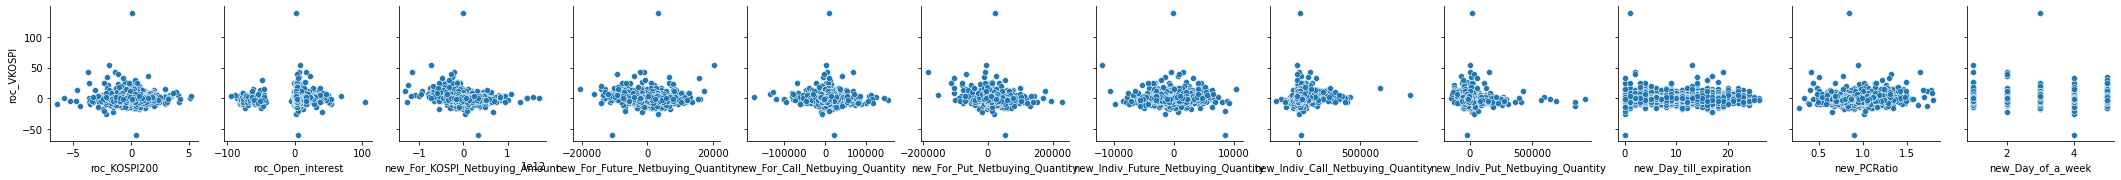

In [19]:
# Explore data

plt.figure(figsize=(10,10))
sns.pairplot(df2, x_vars=['roc_KOSPI200', 'roc_Open_interest',
       'new_For_KOSPI_Netbuying_Amount', 'new_For_Future_Netbuying_Quantity',
       'new_For_Call_Netbuying_Quantity', 'new_For_Put_Netbuying_Quantity',
       'new_Indiv_Future_Netbuying_Quantity',
       'new_Indiv_Call_Netbuying_Quantity', 'new_Indiv_Put_Netbuying_Quantity',
       'new_Day_till_expiration', 'new_PCRatio', 'new_Day_of_a_week'], y_vars=['roc_VKOSPI']);

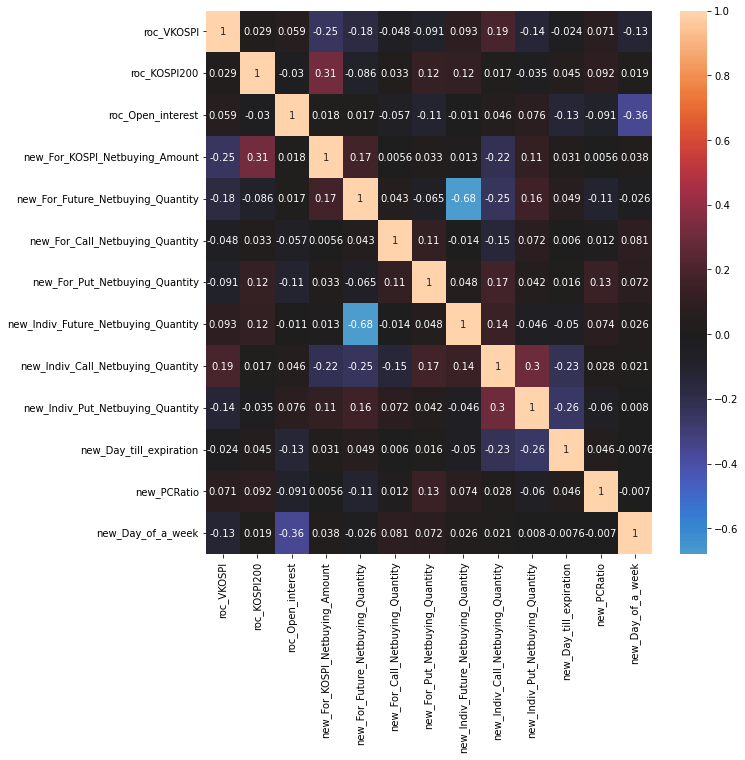

In [20]:
# Explore data

corr_matrix2 = df2.corr()
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_matrix2, annot = True, center = 0);

In [21]:
# Split data

# X2 = feature variables, y2 = a target variable
X2 = df2.drop(['roc_VKOSPI'], axis=1)
y2 = df2['roc_VKOSPI']

print(f"X2: {X2.shape}")

X2: (2579, 12)


In [22]:
# split data 70% for train data set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

print(f"X2_train: {X2_train.shape}")
print(f"y2_train: {y2_train.shape}")
print(f"X2_test:  {X2_test.shape}")
print(f"y2_test:  {y2_test.shape}")

X2_train: (1805, 12)
y2_train: (1805,)
X2_test:  (774, 12)
y2_test:  (774,)


In [23]:
# Model fitting 

# Linear regression
li_model2 = LinearRegression()
li_model2.fit(X2_train, y2_train)

# Logistic regression
logis_model2 = LinearRegression()
logis_model2.fit(X2_train, y2_train)

# Ridge Regression
ridge_model2 = Ridge(alpha=0.01)
ridge_model2.fit(X2_train, y2_train)

# Lasso Regression
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X2_train, y2_train)

# ElasticNet Regression
enet_model2 = ElasticNet(alpha = 0.01)
enet_model2.fit(X2_train, y2_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.08776e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


ElasticNet(alpha=0.01)

In [24]:
# Model evaluation

# Linear regression
pred_li_test2 = li_model2.predict(X2_test)
rmse_li2 = mean_squared_error(y2_test, pred_li_test2, squared=False).round(4)
test_r2_li2 = li_model2.score(X2_test, y2_test).round(4)
print(f"RMSE from Linear model2 : {rmse_li2}")
print(f"R-squared from Linear model2 : {test_r2_li2}")

# Logistic regression
pred_logis_test2 = logis_model2.predict(X2_test)
rmse_logis2 = mean_squared_error(y2_test, pred_logis_test2, squared=False).round(4)
test_r2_logis2 = logis_model2.score(X2_test, y2_test).round(4)
print(f"\nRMSE from Logistic model2 : {rmse_logis2}")
print(f"R-squared from Logistic model2 : {test_r2_logis2}")

# Ridge Regression
pred_ridge_test2 = ridge_model2.predict(X2_test)
rmse_ridge2 = mean_squared_error(y2_test, pred_ridge_test2, squared=False).round(4)
test_r2_ridge2 = ridge_model2.score(X2_test, y2_test).round(4)
print(f"\nRMSE from Ridge model2 : {rmse_ridge2}")
print(f"R-squared from Ridge model2 : {test_r2_ridge2}")

# Lasso Regression
pred_lasso_test2 = lasso_model2.predict(X2_test)
rmse_lasso2 = mean_squared_error(y2_test, pred_lasso_test2, squared=False).round(4)
test_r2_lasso2 = lasso_model2.score(X2_test, y2_test).round(4)
print(f"\nRMSE from Lasso model2 : {rmse_lasso2}")
print(f"R-squared from Lasso model2 : {test_r2_lasso2}")

# ElasticNet Regression
pred_enet_test2 = enet_model2.predict(X2_test)
rmse_enet2 = mean_squared_error(y2_test, pred_enet_test2, squared=False).round(4)
test_r2_enet2 = enet_model2.score(X2_test, y2_test).round(4)
print(f"\nRMSE from ElasticNet model2 : {rmse_enet2}")
print(f"R-squared from ElasticNet model2 : {test_r2_enet2}")

RMSE from Linear model2 : 4.9962
R-squared from Linear model2 : 0.2041

RMSE from Logistic model2 : 4.9962
R-squared from Logistic model2 : 0.2041

RMSE from Ridge model2 : 4.9962
R-squared from Ridge model2 : 0.2041

RMSE from Lasso model2 : 4.998
R-squared from Lasso model2 : 0.2035

RMSE from ElasticNet model2 : 4.9986
R-squared from ElasticNet model2 : 0.2033


# Finally

Even though we turn to forecasts based on the **rate of change**, the R-square value is even lower (0.2041), i.e. we cannot predict VKOPSI this time.

Recommendation
We may need to increase the amount of training data and add new parameters that may be relevant.

My money making project this time haven't found a chance yet. I'm still trying to find other opportunities. Stay tuned.